In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df =pd.read_csv("/kaggle/input/cropdata/preprocessed_700.csv")
df.head(6)

,Name,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season
0,Apple,High,Day Neutral,10:10:10,21.063204,1932.402709,6.567764,12.716549,860.189066,92.677579,89.266502,40.330099,180.635740,12.847482,low_acidic,Sandy Loam,Fall
1,Apple,High,Day Neutral,10:10:10,19.511305,1589.295994,6.784538,13.544560,797.660760,92.293923,92.808150,37.131922,179.042979,13.894292,neutral,Sandy Loam,Fall
2,Apple,High,Day Neutral,10:10:10,23.045662,1269.789133,6.619155,12.330668,910.861369,91.798926,84.248590,38.693498,163.604138,13.372204,low_acidic,Sandy Loam,Fall
3,Apple,High,Short Day Period,10:10:10,17.986016,1944.180144,6.638623,12.965340,922.725203,92.742710,84.780429,43.950592,173.881606,11.801568,neutral,Sandy Loam,Spring
4,Apple,High,Day Neutral,10:10:10,23.775354,1790.352815,6.654898,12.895817,821.411003,90.981530,91.197126,45.564470,174.324935,10.660521,neutral,Sandy Loam,Fall
5,Apple,High,Short Day Period,10:10:10,16.899086,2008.480257,6.505550,13.005758,809.958667,93.350667,92.350033,41.797624,169.463620,11.724087,low_acidic,Sandy Loam,Fall


The n-p-k ratios and we have indivitual values nitrogen,phosphorous pottasium are same .Similarly we have numerical ph and category ph values.So dropping N-P-K Ratio and pH

In [3]:
df1=df.drop(["N-P-K Ratio","pH"],axis='columns')
df1.head(5)

,Name,Fertility,Photoperiod,Temperature,Rainfall,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season
0,Apple,High,Day Neutral,21.063204,1932.402709,12.716549,860.189066,92.677579,89.266502,40.330099,180.635740,12.847482,low_acidic,Sandy Loam,Fall
1,Apple,High,Day Neutral,19.511305,1589.295994,13.544560,797.660760,92.293923,92.808150,37.131922,179.042979,13.894292,neutral,Sandy Loam,Fall
2,Apple,High,Day Neutral,23.045662,1269.789133,12.330668,910.861369,91.798926,84.248590,38.693498,163.604138,13.372204,low_acidic,Sandy Loam,Fall
3,Apple,High,Short Day Period,17.986016,1944.180144,12.965340,922.725203,92.742710,84.780429,43.950592,173.881606,11.801568,neutral,Sandy Loam,Spring
4,Apple,High,Day Neutral,23.775354,1790.352815,12.895817,821.411003,90.981530,91.197126,45.564470,174.324935,10.660521,neutral,Sandy Loam,Fall


In [4]:
#converting yield into kg/m2
df1['Yield']=round(df1['Yield']*(0.1),4)
df1.head()

,Name,Fertility,Photoperiod,Temperature,Rainfall,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season
0,Apple,High,Day Neutral,21.063204,1932.402709,12.716549,860.189066,92.677579,89.266502,40.330099,180.635740,1.2847,low_acidic,Sandy Loam,Fall
1,Apple,High,Day Neutral,19.511305,1589.295994,13.544560,797.660760,92.293923,92.808150,37.131922,179.042979,1.3894,neutral,Sandy Loam,Fall
2,Apple,High,Day Neutral,23.045662,1269.789133,12.330668,910.861369,91.798926,84.248590,38.693498,163.604138,1.3372,low_acidic,Sandy Loam,Fall
3,Apple,High,Short Day Period,17.986016,1944.180144,12.965340,922.725203,92.742710,84.780429,43.950592,173.881606,1.1802,neutral,Sandy Loam,Spring
4,Apple,High,Day Neutral,23.775354,1790.352815,12.895817,821.411003,90.981530,91.197126,45.564470,174.324935,1.0661,neutral,Sandy Loam,Fall


# Scaling Numeric Features

In [5]:
cols_to_scale=['Temperature','Rainfall','Light_Hours','Light_Intensity','Rh','Nitrogen','Phosphorus','Potassium']

scaler=MinMaxScaler()

df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])

In [6]:
categorical_features = ['Name','Photoperiod', 'Fertility', 'Category_pH', 'Soil_Type', 'Season', 'N-P-K Ratio']

In [7]:
# Split the data into features and target variable
X = df1.drop('Yield',axis='columns')
y = df1['Yield']

In [8]:
X.head(5)

,Name,Fertility,Photoperiod,Temperature,Rainfall,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Category_pH,Soil_Type,Season
0,Apple,High,Day Neutral,0.383117,0.640660,0.656983,0.824977,0.896505,0.133100,0.078339,0.267268,low_acidic,Sandy Loam,Fall
1,Apple,High,Day Neutral,0.332332,0.496280,0.727892,0.760025,0.891028,0.142683,0.069119,0.264345,neutral,Sandy Loam,Fall
2,Apple,High,Day Neutral,0.447993,0.361831,0.623937,0.877614,0.883962,0.119522,0.073621,0.236016,low_acidic,Sandy Loam,Fall
3,Apple,High,Short Day Period,0.282417,0.645616,0.678289,0.889938,0.897435,0.120961,0.088776,0.254874,neutral,Sandy Loam,Spring
4,Apple,High,Day Neutral,0.471872,0.580885,0.672335,0.784696,0.872293,0.138324,0.093429,0.255688,neutral,Sandy Loam,Fall


# Split the data into training and testing sets

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# OneHotEncoding the Categorical Values

In [10]:
# Define the preprocessing steps

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['Name', 'Fertility','Photoperiod','Category_pH','Soil_Type','Season']),
        # Add other preprocessing steps if needed
    ])

The accuracy of the Linear Regression Model Train is 99.54
The accuracy of the Linear Regression Model Test is 99.51


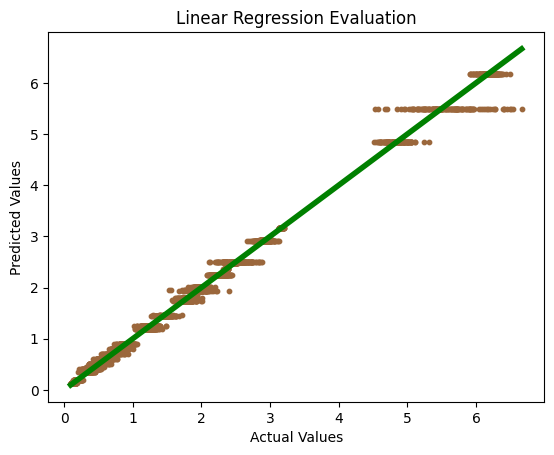

The accuracy of the Random Forest Model Train is 99.54
The accuracy of the Random Forest Model Test is 99.51


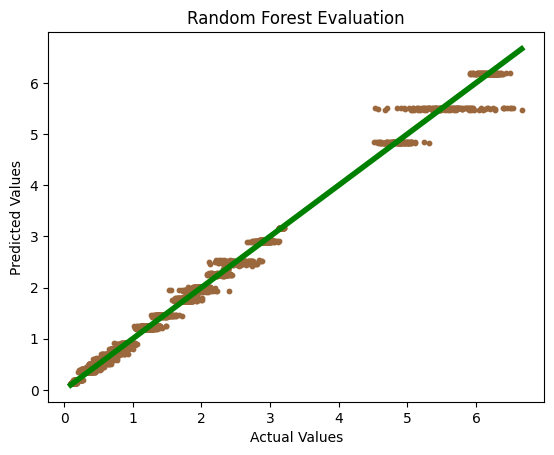

The accuracy of the Gradient Boost Model Train is 96.02
The accuracy of the Gradient Boost Model Test is 95.76


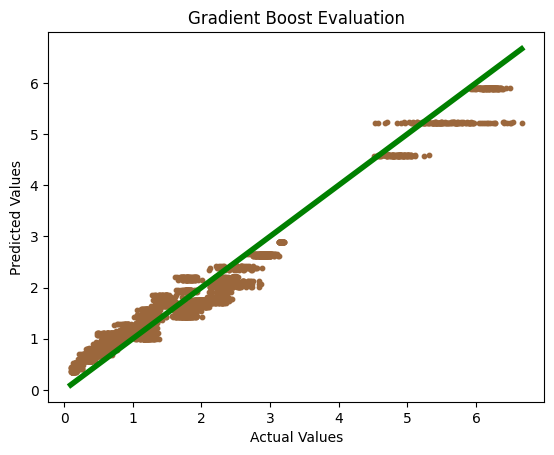

The accuracy of the XGBoost Model Train is 99.54
The accuracy of the XGBoost Model Test is 99.51


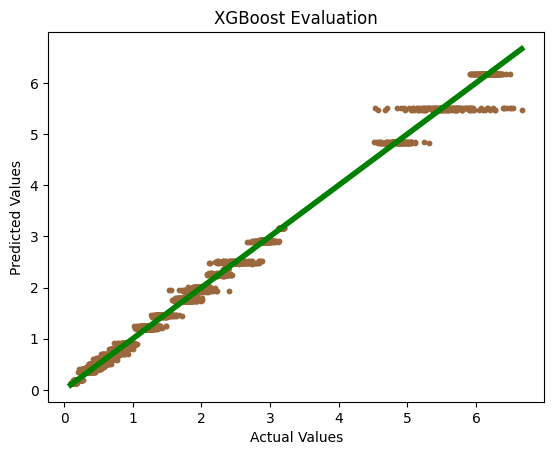

The accuracy of the KNN Model Train is 99.40
The accuracy of the KNN Model Test is 99.42


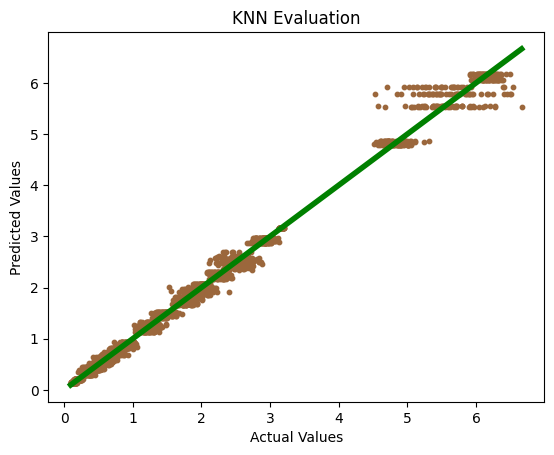

The accuracy of the Decision Tree Model Train is 99.54
The accuracy of the Decision Tree Model Test is 99.51


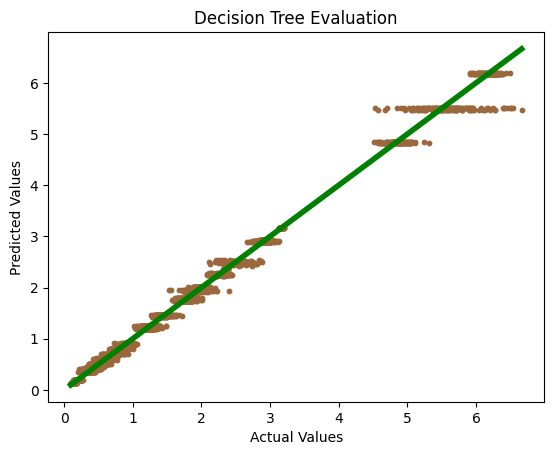

The accuracy of the Bagging Regressor Model Train is 99.54
The accuracy of the Bagging Regressor Model Test is 99.51


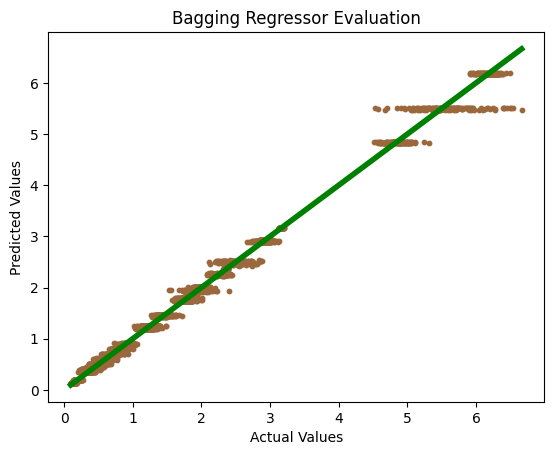

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.995112,0.010062,0.995112
1,Random Forest,0.995079,0.010130,0.995079
2,Gradient Boost,0.957579,0.087332,0.957579
3,XGBoost,0.995099,0.010090,0.995099
4,KNN,0.994176,0.011991,0.994176
5,Decision Tree,0.995083,0.010124,0.995083
6,Bagging Regressor,0.995077,0.010135,0.995077


In [11]:


results = []
# Define a list of models to evaluate within pipelines
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor', BaggingRegressor(n_estimators=150, random_state=42))
]

# Iterate over the models
for name, model in models:
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    accuracy = pipeline.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    
    # Append the results
    results.append((name, accuracy, MSE, R2_score))
    
    # Calculate and print training and testing accuracy
    train_acc = pipeline.score(X_train, y_train) * 100
    print(f'The accuracy of the {name} Model Train is {train_acc:.2f}')
    test_acc = accuracy * 100
    print(f'The accuracy of the {name} Model Test is {test_acc:.2f}')
    
    # Plot the predictions vs actual values
    plt.scatter(y_test, y_pred, s=10, color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=4)
    plt.title(f'{name} Evaluation')
    plt.show()

# Create a DataFrame to display the results
dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])

# Style the DataFrame to highlight the best and worst models
df_styled_best = dff.style.highlight_max(subset=['Accuracy', 'R2_score'], color='green')\
                           .highlight_min(subset=['MSE'], color='green')\
                           .highlight_min(subset=['Accuracy', 'R2_score'], color='red')\
                           .highlight_max(subset=['MSE'], color='red')

# Display the styled DataFrame
display(df_styled_best)

In [12]:
import numpy as np

results = []

# Define a list of models to evaluate within pipelines
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
   ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
   ('Bagging Regressor', BaggingRegressor(n_estimators=150, random_state=42)),
 
]

# Iterate over the models
for name, model in models:
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    accuracy = pipeline.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSPE = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
    
    R2_score_val = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, MAE, MAPE, RMSE, RMSPE, R2_score_val))
    
    print(name)
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True)
    scores = cross_val_score(pipeline, X, y, cv=kf)

    for fold, score in enumerate(scores):
        print(f"Fold {fold+1}: {score}")

    mean_score = np.mean(scores)
    print(f"Mean Score: {mean_score}")
    print('-' * 30)
        

# Create a DataFrame to display the results
df1 = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'MAE', 'MAPE', 'RMSE', 'RMSPE', 'R2_score'])

# Style the DataFrame to highlight the best and worst models
df1_styled_best = df1.style.highlight_max(subset=['Accuracy', 'R2_score'], color='lightblue')\
                           .highlight_min(subset=['MSE', 'MAE', 'MAPE'], color='lightblue')\
                           .highlight_max(subset=['MSE', 'MAE', 'MAPE'], color='red')\
                           .highlight_min(subset=['Accuracy', 'R2_score'], color='red')

# Display the styled DataFrame
display(df1_styled_best)

Linear Regression
Fold 1: 0.9949046529536247
Fold 2: 0.9951837661263684
Fold 3: 0.9954234979025041
Fold 4: 0.9957695112696509
Fold 5: 0.99548229120945
Mean Score: 0.9953527438923195
------------------------------
Random Forest
Fold 1: 0.9956826319352442
Fold 2: 0.9954158298312636
Fold 3: 0.9953398337286851
Fold 4: 0.9948293172526849
Fold 5: 0.9951298907913015
Mean Score: 0.9952795007078358
------------------------------
Gradient Boost
Fold 1: 0.9589154063907436
Fold 2: 0.9610180555253486
Fold 3: 0.9603283428005965
Fold 4: 0.9610707236180305
Fold 5: 0.96059413544647
Mean Score: 0.9603853327562379
------------------------------
XGBoost
Fold 1: 0.9955101072741519
Fold 2: 0.9951808431096176
Fold 3: 0.995290297769641
Fold 4: 0.9952305421363332
Fold 5: 0.9953139058009091
Mean Score: 0.9953051392181307
------------------------------
KNN
Fold 1: 0.9940905692268653
Fold 2: 0.9946466457090579
Fold 3: 0.9945560027058993
Fold 4: 0.9933177006628552
Fold 5: 0.994454227008754
Mean Score: 0.9942130290

,Model,Accuracy,MSE,MAE,MAPE,RMSE,RMSPE,R2_score
0,Linear Regression,0.995112,0.010062,0.057467,0.050394,0.100310,8.096533,0.995112
1,Random Forest,0.995079,0.010130,0.057779,0.050652,0.100648,8.136991,0.995079
2,Gradient Boost,0.957579,0.087332,0.271469,0.338323,0.295521,54.068528,0.957579
3,XGBoost,0.995099,0.010090,0.057667,0.050636,0.100450,8.145424,0.995099
4,KNN,0.994176,0.011991,0.062914,0.054630,0.109502,8.775422,0.994176
5,Decision Tree,0.995083,0.010124,0.057765,0.050632,0.100617,8.136034,0.995083
6,Bagging Regressor,0.995077,0.010135,0.057783,0.050655,0.100672,8.139171,0.995077



# Interpretation of the Results:
**Linear Regression:**

Very high R²score (0.995112), indicating an excellent fit.
Low MSE (0.010062) and MAE (0.057467), indicating small prediction errors.
Low RMSE (0.100310) and RMSPE (8.096533), indicating small error magnitudes.

**Random Forest:**

Similar performance to Linear Regression with a very high R²score (0.995079).
Slightly higher MSE (0.010130) and MAE (0.057779) than Linear Regression.
Comparable RMSE (0.100648) and RMSPE (8.136991) to Linear Regression.

**Gradient Boost:**

Lower R²score (0.957579), indicating a slightly poorer fit compared to the other models.
Higher MSE (0.087332) and MAE (0.271469), indicating larger prediction errors.
Higher RMSE (0.295521) and RMSPE (54.068528), indicating larger error magnitudes.

**XGBoost:**

Very high R² score (0.995099), indicating an excellent fit similar to Linear Regression and Random Forest.
Low MSE (0.010090) and MAE (0.057667), indicating small prediction errors.
Low RMSE (0.100450) and RMSPE (8.145424), indicating small error magnitudes.

**KNN (K-Nearest Neighbors):**

High R²score (0.994176), indicating a good fit.
Slightly higher MSE (0.011991) and MAE (0.062914) than the top models.
Higher RMSE (0.109502) and RMSPE (8.775422), indicating slightly larger error magnitudes.

**Decision Tree:**

Very high R²score (0.995083), indicating an excellent fit.
Low MSE (0.010124) and MAE (0.057765), similar to Linear Regression and Random Forest.
Low RMSE (0.100617) and RMSPE (8.136034), indicating small error magnitudes.

**Bagging Regressor:**

Very high R² score (0.995077), indicating an excellent fit.
Low MSE (0.010135) and MAE (0.057783), similar to Linear Regression and Random Forest.
Low RMSE (0.100672) and RMSPE (8.139171), indicating small error magnitudes.

* Best Performing Models: Linear Regression, Random Forest, XGBoost, Decision Tree, and Bagging Regressor. These models have very high R² scores and low error metrics (MSE, MAE, RMSE, and RMSPE).
* Underperforming Model: Gradient Boost. This model has a lower R² score and higher error metrics compared to the others, indicating it is not fitting the data as well.